In [1]:
import os, sys, errno, time
import numpy as np

import lib.midi as midi
import lib.util as util

import matplotlib.pyplot as plt

In [2]:
scoredir = '/home/thickstn/alignment-eval/data/score/'
perfdir = '/home/thickstn/alignment-eval/data/perf/'
gtdir = '/home/thickstn/alignment-eval/align/ground/'
spectradir = '/home/thickstn/alignment-eval/align/spectra/'
chromadir = '/home/thickstn/alignment-eval/align/chroma/'
cqtdir = '/home/thickstn/alignment-eval/align/cqt/'

file = '000_bwv863p'

In [3]:
perf_audio = os.path.join(perfdir, file + '.wav')
perf_transcript = os.path.join(perfdir, file + '.midi')
score = os.path.join(scoredir, util.map_score(file) + '.midi')
    
gt_align = os.path.join(gtdir, file + '.txt')
sp_align = os.path.join(spectradir, file + '.txt')
ch_align = os.path.join(chromadir, file + '.txt')
cqt_align = os.path.join(cqtdir, file + '.txt')

perf_events,perf_start,perf_end = midi.load_midi_events(perf_transcript, strip_ends=False)
score_events,score_start,score_end = midi.load_midi_events(score, strip_ends=False)

In [4]:
gt_alignment = np.loadtxt(gt_align)
sp_alignment = np.loadtxt(sp_align)
ch_alignment = np.loadtxt(ch_align)
cqt_alignment = np.loadtxt(cqt_align)

perfroll = util.pianoroll(perf_events)
groundroll = util.pscore(score_events, gt_alignment, start=perf_start)
spectraroll = util.pscore(score_events, sp_alignment, start=perf_start)
chromaroll = util.pscore(score_events, ch_alignment, start=perf_start)
cqtroll = util.pscore(score_events, cqt_alignment, start=perf_start)

# Visualizing the ground-truth alignment

Text(0,0.5,'Pitch')

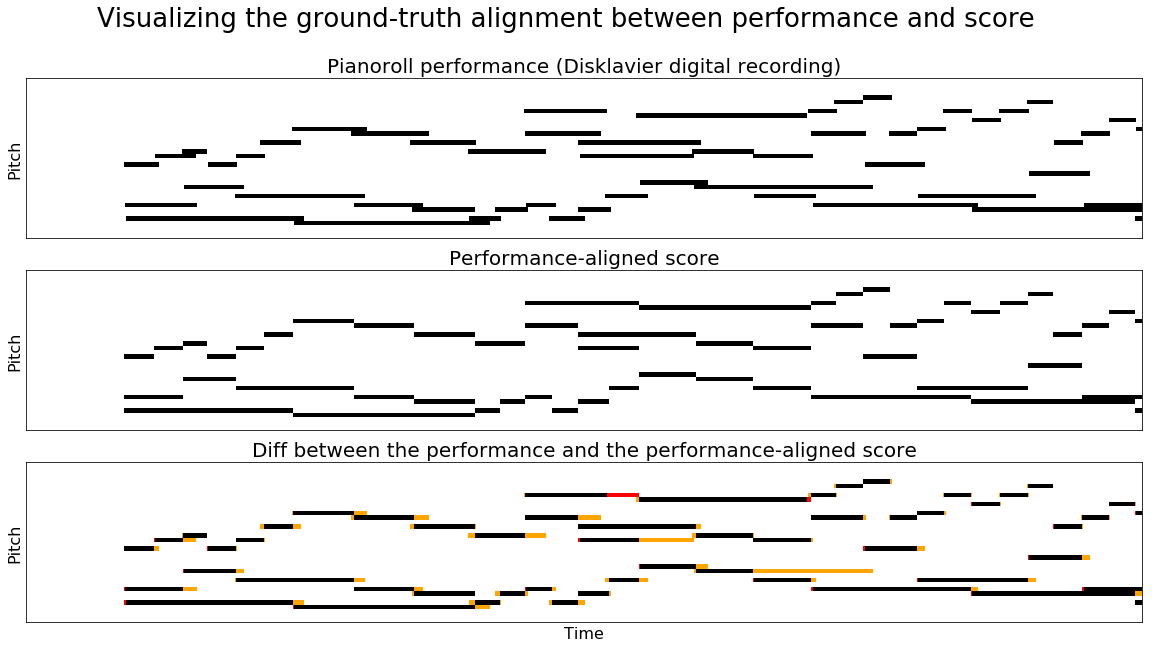

In [5]:
num_windows = 1000

fig, ax = plt.subplots(3,figsize=(20, 10), sharex=True)
fig.suptitle('Visualizing the ground-truth alignment between performance and score', fontsize=26)

ax[0].imshow(perfroll[:,50:90][:num_windows,::-1].T, interpolation='none', cmap='Greys', aspect=4)
ax[0].set_title('Pianoroll performance (Disklavier digital recording)', fontsize=20)
ax[0].set_xticks([]); ax[0].set_yticks([])
ax[0].set_ylabel('Pitch', fontsize=16)
ax[1].imshow(groundroll[:,50:90][:num_windows,::-1].T, interpolation='none', cmap='Greys', aspect=4)
ax[1].set_title('Performance-aligned score', fontsize=20)
ax[1].set_xticks([]); ax[1].set_yticks([])
ax[1].set_ylabel('Pitch', fontsize=16)
util.colorplot(ax[2], perfroll[:,50:90][:num_windows,::-1], groundroll[:num_windows,50:90][:,::-1])
ax[2].set_title('Diff between the performance and the performance-aligned score', fontsize=20)
ax[2].set_xticks([]); ax[2].set_yticks([])
ax[2].set_xlabel('Time', fontsize=16)
ax[2].set_ylabel('Pitch', fontsize=16)

# Comparing alignment algorithms to the ground-truth alignment

Text(0,0.5,'Pitch')

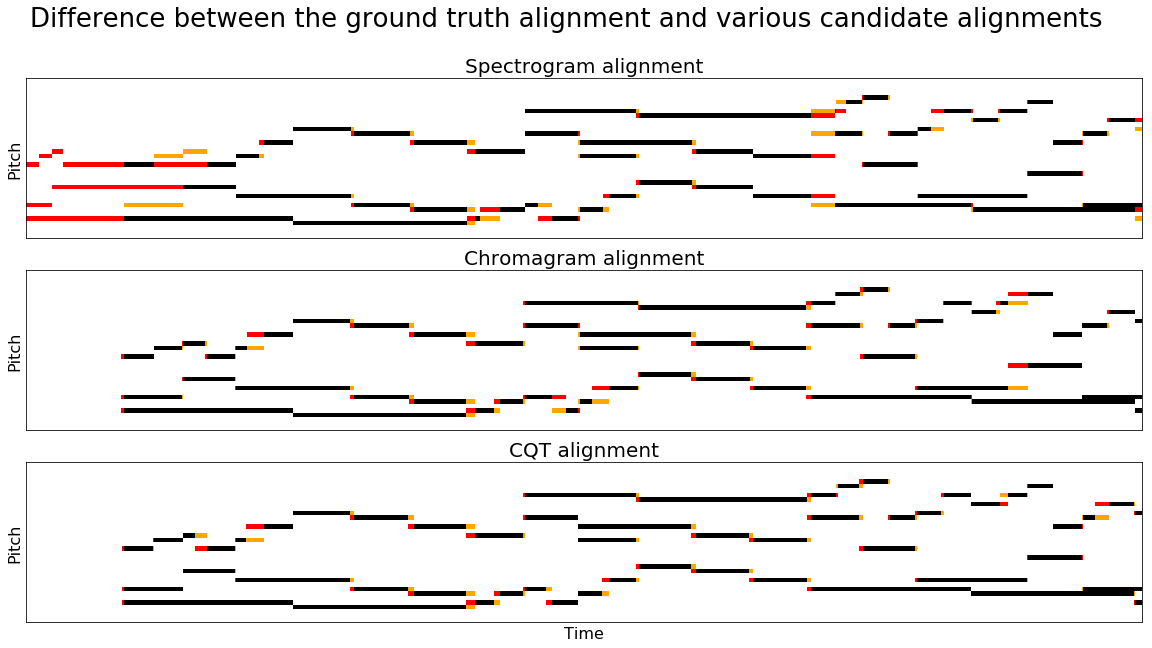

In [6]:
num_windows = 1000

fig, ax = plt.subplots(3,figsize=(20, 10),sharex=True)
fig.suptitle('Difference between the ground truth alignment and various candidate alignments', fontsize=26)

util.colorplot(ax[0], groundroll[:,50:90][:num_windows,::-1], spectraroll[:num_windows,50:90][:,::-1])
ax[0].set_title('Spectrogram alignment', fontsize=20)
ax[0].set_xticks([]); ax[0].set_yticks([])
ax[0].set_ylabel('Pitch', fontsize=16)
util.colorplot(ax[1], groundroll[:,50:90][:num_windows,::-1], chromaroll[:num_windows,50:90][:,::-1])
ax[1].set_title('Chromagram alignment', fontsize=20)
ax[1].set_xticks([]); ax[1].set_yticks([])
ax[1].set_ylabel('Pitch', fontsize=16)
util.colorplot(ax[2], groundroll[:,50:90][:num_windows,::-1], cqtroll[:num_windows,50:90][:,::-1])
ax[2].set_title('CQT alignment', fontsize=20)
ax[2].set_xticks([]); ax[2].set_yticks([])
ax[2].set_xlabel('Time', fontsize=16)
ax[2].set_ylabel('Pitch', fontsize=16)